# Classification

In [190]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


%matplotlib inline

## Lab

In [14]:
smarket = pd.read_csv('data/smarket.csv')
smarket.head()



,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [13]:
# Replace the Up/Down values with 1 and 0
smarket['Direction'] = np.where(smarket['Direction']=="Up",1,0)

In [15]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Direction,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


In [33]:
X = smarket[['Lag1', "Lag2","Lag3","Lag4","Lag5"]].values
Y = smarket['Direction'].values

In [34]:
np.unique(smarket['Year'].values)

array([2001, 2002, 2003, 2004, 2005])

In [45]:
# Splitting the data in train/test by year 2005
X_train = X[ smarket['Year'] < 2005]
X_test = X[~(smarket['Year'] < 2005)]
Y_train = Y[smarket['Year'] < 2005]
Y_test = Y[~(smarket['Year'] < 2005)]

In [50]:
model = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data=smarket).fit()
model.summary()



Optimization terminated successfully.
         Current function value: 0.691327
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                0.001651
Time:                        13:51:38   Log-Likelihood:                -864.16
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0742      0.057      1.309      0.191      -0.037       0.185
Lag1          -0.0713      0.050     -1.424      0.155      -0.170       0.027
Lag2          -0.0441      0.050     -0.882      0.378      -0.142       0.054
Lag3           0.0092      0.050      0.185      0.853      -0.089       0.107
Lag4           0.0072      0.050      0.145      0.885      -0.091       0.105
Lag5           0.0093      0.049      0.188      0.851      -0.088       0.106
==============================================================================
"""

In [54]:
l_r = LogisticRegression()
l_r.fit(X_train, Y_train)
Y_pred = l_r.predict(X_test)


/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
confusion_matrix(Y_test,Y_pred)
######                  Predicted down ||  Predicted UP
######    Actual down     37           ||  74
######   --------------------------------------------- 
######    Actual Up       31           ||   110

array([[ 37,  74],
       [ 31, 110]])

In [63]:
print("Accuracy for Down movement: {0:.4f} ".format(37/68))
print("Accuracy for Up movement: {0:.4f} ".format (110/184))
print("Total accuracy : {0:.4f} ".format((37+110)/(31+37+74+110)))



Accuracy for Down movement: 0.5441 %
Accuracy for Up movement: 0.5978 %
Total accuracy : 0.5833 %


In [66]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
confusion_matrix(Y_test, lda.predict(X_test))


array([[ 37,  74],
       [ 30, 111]])

In [162]:
print("Accuracy for Down movement: {0:.4f} ".format(37/67))
print("Accuracy for Up movement: {0:.4f} ".format (111/185))
print("Total accuracy : {0:.4f} ".format((37+111)/(30+37+74+111)))



Accuracy for Down movement: 0.5522 
Accuracy for Up movement: 0.6000 
Total accuracy : 0.5873 


In [69]:
# QDA for only 2 variables
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[:,:2], Y_train)
confusion_matrix(Y_test, qda.predict(X_test[:,:2]))

array([[ 30,  81],
       [ 20, 121]])

In [73]:
print("Accuracy for Down movement: {0:.4f} ".format(30/50))
print("Accuracy for Up movement: {0:.4f} ".format (121/202))
print("Total accuracy : {0:.4f} ".format((30+121)/(30+20+81+121)))


Accuracy for Down movement: 0.6000 %
Accuracy for Up movement: 0.5990 %
Total accuracy : 0.5992 %


In [72]:
# Also wth 2 variables only
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:,:2], Y_train)
confusion_matrix(Y_test, knn.predict(X_test[:,:2]))




array([[48, 63],
       [55, 86]])

In [161]:
print("Accuracy for Down movement: {0:.4f} ".format(48/103))
print("Accuracy for Up movement: {0:.4f} ".format (86/149))
print("Total accuracy : {0:.4f} ".format((48+86)/(55+48+63+86)))

Accuracy for Down movement: 0.4660 
Accuracy for Up movement: 0.5772 
Total accuracy : 0.5317 


The total accuracy of the models seems similar. It can be noticed that KNN model registered the lowest score, while QDA the best.

## Applied

In [95]:
## 10
weekly = pd.read_csv("data/weekly.csv")
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


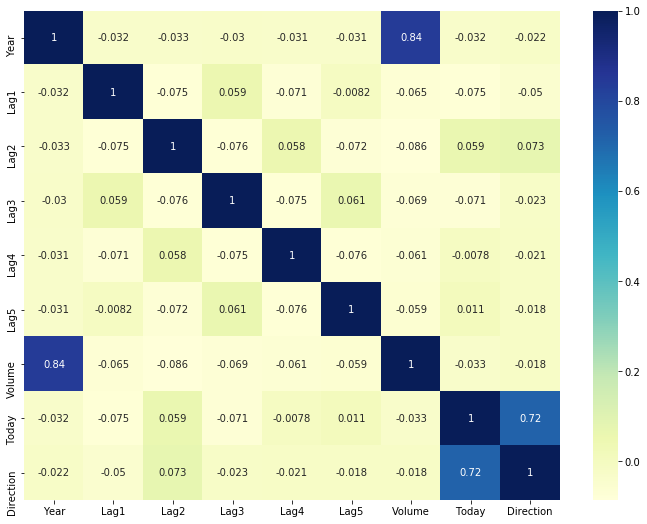

In [96]:
weekly['Direction'] = np.where(weekly['Direction']=="Up",1,0)

fig, ax     = plt.subplots(figsize=(12, 9))
sns.heatmap(weekly.corr(), cmap="YlGnBu",annot=True)

The highest correlaton is between  <b>Year</b> and <b> Volume </b> and <b> Direction </b> and <b> Today </b> .

In [97]:
model = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                0.006580
Time:                        15:26:29   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Only <b> Lag2 </b> is statisticaly significant.

In [98]:
model = smf.logit('Direction ~ Lag2', data=weekly).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                0.003866
Time:                        15:28:12   Log-Likelihood:                -745.21
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                   0.01617
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2147      0.061      3.507      0.000       0.095       0.335
Lag2           0.0628      0.026      2.382      0.017       0.011       0.114
==============================================================================
"""

In [102]:
## .c)
# make the prediction of the full dataset and convert to a class based on the threshhold

predict = np.where(model.predict(weekly) > 0.5, 1, 0)



In [103]:
confusion_matrix(weekly['Direction'], predict)
######                  Predicted down ||  Predicted UP
######    Actual down     33           ||  451
######   --------------------------------------------- 
######    Actual Up       26           ||   579

array([[ 33, 451],
       [ 26, 579]])

In [160]:
print("Accuracy for Down movement: {0:.4f} ".format(33/59))
print("Accuracy for Up movement: {0:.4f} ".format (579/(579+451)))
print("Total accuracy {0:.4f} ".format((33+579)/(33+451+26+579)))
print("Mean of the prediction {}".format(weekly['Direction'].mean()))

Accuracy for Down movement: 0.5593 
Accuracy for Up movement: 0.5621 
Total accuracy 0.5620 
Mean of the prediction 0.5555555555555556


The total accuracy of logistic regression is only slightly better than the number of days when the stock goes up.

In [156]:
### d.)
# since the data contains a single feature it need to be reshaped, for that we add a col of ones
index_train = weekly.index[weekly['Year'] < 2009].values
X_train = weekly.iloc[index_train]['Lag2'].values
X_test  = weekly.drop(index_train)['Lag2'].values
y_train = weekly.iloc[index_train]['Direction'].values
y_test = weekly.drop(index_train)['Direction'].values



In [157]:
lr =  LogisticRegression()
lr.fit(X_train.reshape(-1, 1), y_train)

/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [158]:
confusion_matrix(y_test, lr.predict(X_test.reshape(-1,1)))

array([[ 9, 34],
       [ 5, 56]])

In [164]:
print("Accuracy for Down movement: {0:.4f} ".format(9/14))
print("Accuracy for Up movement: {0:.4f} ".format (56/(56+34)))
print("Total accuracy {0:.4f} ".format((9+56)/(9+5+34+56)))
print("Mean of the prediction {}".format(weekly['Direction'].mean()))

# A slight improvement

Accuracy for Down movement: 0.6429 
Accuracy for Up movement: 0.6222 
Total accuracy 0.6250 
Mean of the prediction 0.5555555555555556


In [166]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train.reshape(-1,1), y_train)
confusion_matrix(y_test, lda.predict(X_test.reshape(-1,1)))
#Same as Logistic Regression

array([[ 9, 34],
       [ 5, 56]])

In [168]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train.reshape(-1,1), y_train)
confusion_matrix(y_test, qda.predict(X_test.reshape(-1,1)))
# does not predict down movements

array([[ 0, 43],
       [ 0, 61]])

In [169]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train.reshape(-1,1), y_train)
confusion_matrix(y_test, knn.predict(X_test.reshape(-1,1)))

array([[21, 22],
       [30, 31]])

In [174]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train.reshape(-1,1), y_train)
confusion_matrix(y_test, knn.predict(X_test.reshape(-1,1)))
# the up movement predction has improved, while down got worse.

array([[22, 21],
       [24, 37]])

In [180]:
# some combinations
formula = '''Direction ~ Lag2*Lag1 + Lag2*Lag3 + Lag2*Volume+np.power(Lag2, 2) + 
np.power(Lag1,2) + np.power(Volume,2) +  np.power(Lag3, 2) + np.power(Lag4, 2)'''
model = smf.logit(formula, data=weekly).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.680919
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1076
Method:                           MLE   Df Model:                           12
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                0.008797
Time:                        18:12:16   Log-Likelihood:                -741.52
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.3574
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2500      0.117      2.129      0.033       0.020       0.480
Lag2                    0.0325      0.041      0.793      0.428      -0.048       0.113
Lag1                   -0.0333      0.029     -1.162      0.245      -0.089       0.023
Lag2:Lag1               0.0052      0.008      0.647      0.518      -0.010       0.021
Lag3                   -0.0054      0.028     -0.194      0.846      -0.060       0.049
Lag2:Lag3               0.0063      0.008      0.758      0.448      -0.010       0.023
Volume                 -0.0579      0.115     -0.503      0.615      -0.284       0.168
Lag2:Volume             0.0164      0.013      1.246      0.213      -0.009       0.042
np.power(Lag2, 2)       0.0054      0.006      0.973      0.331      -0.005       0.016
np.power(Lag1, 2)       0.0042      0.006      0.762      0.446      -0.007       0.015
np.power(Volume, 2)     0.0040      0.019      0.206      0.836      -0.034       0.042
np.power(Lag3, 2)       0.0042      0.005      0.793      0.428      -0.006       0.015
np.power(Lag4, 2)      -0.0043      0.005     -0.805      0.421      -0.015       0.006
=======================================================================================
"""

In [217]:
#      11

auto = pd.read_csv('data/auto.csv')
auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [218]:
auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)


In [219]:
# b.)
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


mpg01 is highly correlated with mpg, cylinders, displacement and weight.

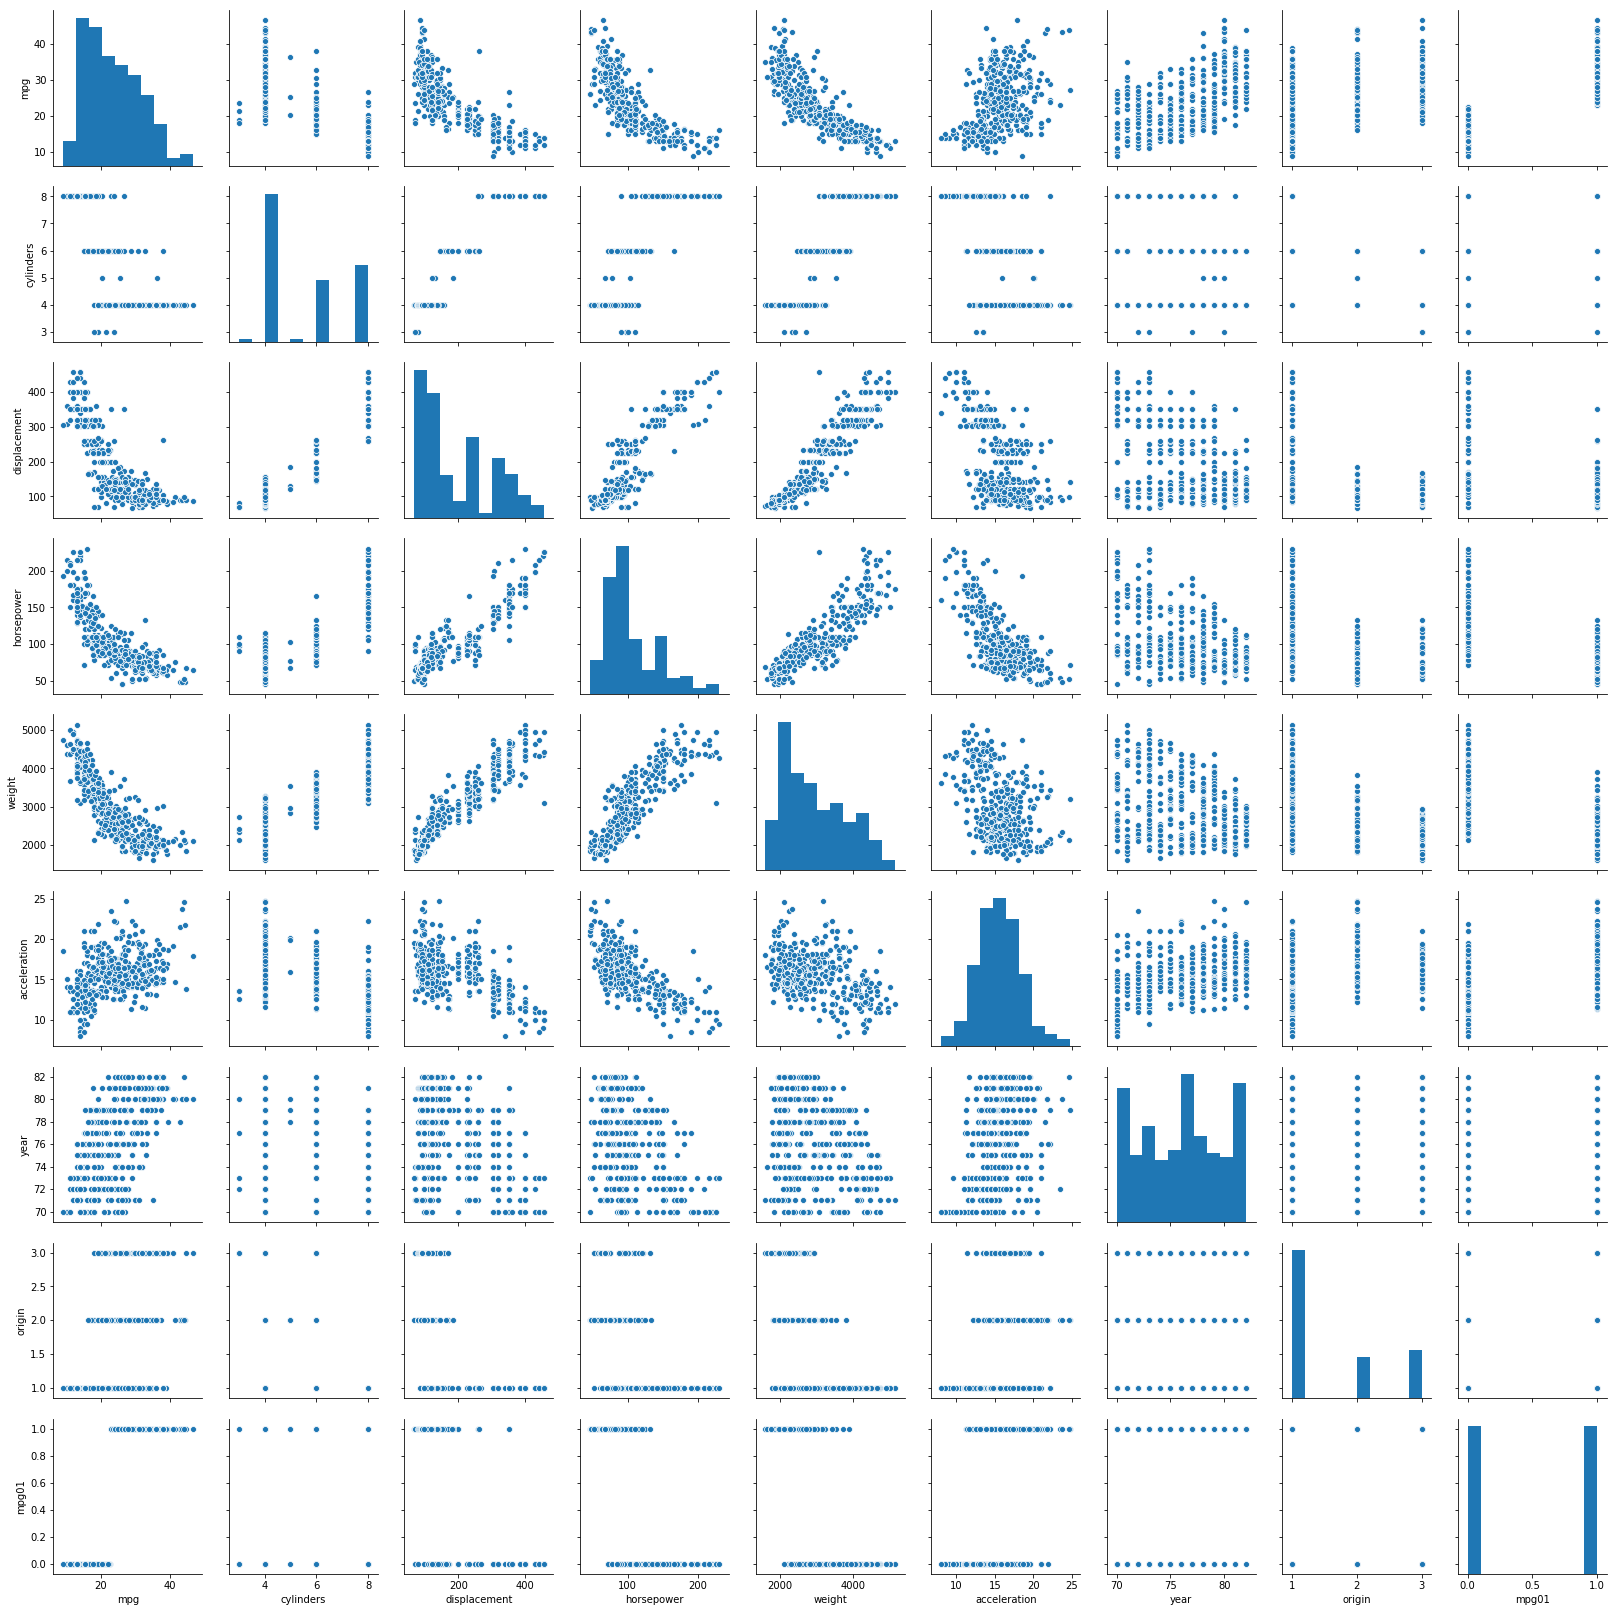

In [220]:
sns.pairplot(auto)
plt.show()

In [227]:
X = auto[auto.columns.difference([ 'mpg','name','mpg01'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.8571428571428571

In [228]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8673469387755102

In [229]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.8979591836734694

In [230]:
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    print('With K={} accuracy is {:.3f}'.format(k, accuracy))

With K=1 accuracy is 0.806
With K=2 accuracy is 0.837
With K=3 accuracy is 0.878
With K=4 accuracy is 0.878
With K=5 accuracy is 0.857
With K=6 accuracy is 0.857
With K=7 accuracy is 0.867
With K=8 accuracy is 0.867
With K=9 accuracy is 0.857
With K=10 accuracy is 0.878
With K=11 accuracy is 0.867
With K=12 accuracy is 0.867
With K=13 accuracy is 0.867
With K=14 accuracy is 0.867


In [233]:
#QDA has the best performance. For the KNN the best estimate fore k is 3,4 and 10.

In [234]:
#     12 
def power(a,x):
    return a**x
power(2,3)    

8

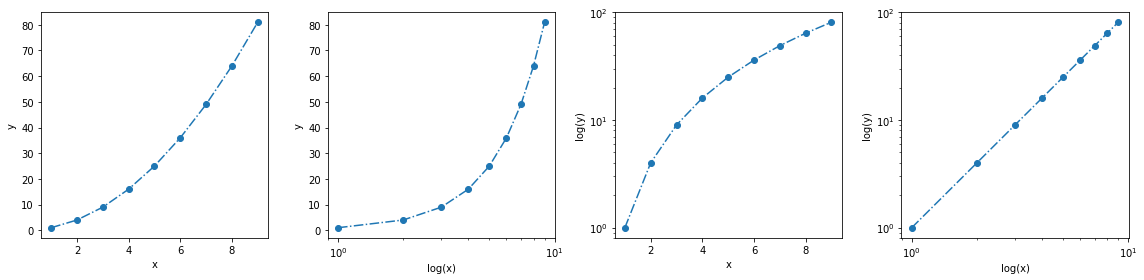

In [237]:
x = np.arange(1,10)
y = power(x,2)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(16,4))

# Plot x vs y
ax1.plot(x,y,linestyle='-.', marker='o')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot log(x) vs y
ax2.semilogx(x,y, linestyle='-.', marker='o')
ax2.set_xlabel('log(x)')
ax2.set_ylabel('y')

# Plot x vs log(y)
ax3.semilogy(x,y, linestyle='-.', marker='o')
ax3.set_xlabel('x')
ax3.set_ylabel('log(y)')

# Plot log log
ax4.loglog(x,y, linestyle='-.', marker='o')
ax4.set_xlabel('log(x)')
ax4.set_ylabel('log(y)')

plt.tight_layout()

In [238]:
#   13
boston = pd.read_csv('data/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [239]:
boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0)

In [240]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [241]:
###  Quadratic Discriminat Analysis
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))



0.8976377952755905

In [244]:
### Logistic Regression

X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

/home/sabin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8740157480314961

In [251]:
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    print('With K={} accuracy is {:.3f}'.format(k, accuracy))

With K=1 accuracy is 0.945
With K=2 accuracy is 0.937
With K=3 accuracy is 0.921
With K=4 accuracy is 0.921
With K=5 accuracy is 0.921
With K=6 accuracy is 0.921
With K=7 accuracy is 0.898
With K=8 accuracy is 0.882
With K=9 accuracy is 0.898
With K=10 accuracy is 0.874
With K=11 accuracy is 0.866
With K=12 accuracy is 0.827
With K=13 accuracy is 0.835
With K=14 accuracy is 0.819
